# ТВиМС Задание 4

## Вариант 14

Проверка статистических гипотез.
Критерии согласия Пирсона, Колмогорова, Мизеса.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
a = 0
b = math.pi / 4

In [4]:
def get_x():
    return  + random.random()*(b-a)

def y_func(x):
    return math.tan(x)

def get_y():
    return y_func(get_x())

In [5]:
def generate_varseries(n):
    ys = []

    for i in range(n):
        ys.append(get_y())

    ys.sort()
    return ys

In [6]:
def Fy_deduced(y):
    if y < 0:
        return 0
    elif y > 1:
        return 1
    else:
        return 4 / math.pi * math.atan(y)

def fy_deduced(y):
    if y < 0 or y > 1:
        return 0
    else:
        return 4 / (math.pi * (1 + y**2))

***

In [7]:
# (copied from second_and_third.ipynb with slight modifications)
def histogram_data_beta(a, b, vs, group_num, normalize=True):
    """Return data needed for type 2 histogram
    as a list of tuples each being:
    (a bin's left bound, a bin's occurrences count)
    
    Each bin's interval has its left bound included
    and right excluded, e.g. [0, 1), [1, 2), [3, 4), ...

    Примечание: работает только для НСВ с почти-лишь-только-один-раз-встречающимися
    элементами вариационного ряда (здесь вар-ряд = выборка из-за *высокой степени
    уникальности* элементов выборки, т.е. элементы списка 'vs' могут повторяться,
    но это очень маловероятно, если число b-a неотрицательного порядка/
    однозначного отрицательного порядка - порядок условно от -9 до 10+)
    """
    bin_capacity = len(vs) // group_num + (1 if len(vs) % group_num != 0 else 0)

    hdata = [[a, 0]]
    for i in range(len(vs)):
        hdata[-1][1] += 1
        last_bin_empty = False

        # if the last bin is full:
        if hdata[-1][1] == bin_capacity:
            # calculate its right bound:
            if i == len(vs) - 1:
                right_bound = b
            else:
                right_bound = (vs[i] + vs[i+1]) / 2

            # add a new empty bin:
            hdata.append([right_bound, 0])
            last_bin_empty = True

    if last_bin_empty:
        del hdata[-1]

    if normalize:
        square = 0
        for i in range(len(hdata) - 1):
            # calculating local density and updating square:
            hdata[i][1] = hdata[i][1] / (hdata[i+1][0] - hdata[i][0])
            square += hdata[i][1] * (hdata[i+1][0] - hdata[i][0])
        
        hdata[-1][1] = hdata[-1][1] / (b - hdata[-1][0])
        square += hdata[-1][1] * (b - hdata[-1][0])

        for hd in hdata:
            hd[1] /= square
    else:
        for hd in hdata:
            hd[1] /= len(vs)

    hdata.append([b, hdata[-1][1]])
            
    return hdata

***

### Критерий согласия Пирсона

In [8]:
def xi_squared_criteria(a, b, n, group_num, f_hypothesis):
    vs = generate_varseries(n)
    hdata = histogram_data_beta(a, b, vs, group_num, normalize=False)

    hypothesis_ys = [Fy_deduced(hdata[i+1][0]) - Fy_deduced(hdata[i][0])
                     for i in range(group_num)]
    histogram_ys = [hd[1] for hd in hdata[:-1]]

    # checking this weird condition from bsuir docs:
    assert abs(1 - sum(hypothesis_ys)) <= 0.01

    summands = []
    for i in range(group_num):
        summand = ((histogram_ys[i] - hypothesis_ys[i])**2
                   / (hypothesis_ys[i]))
        summands.append(summand)

    xi_squared = n*sum(summands)
    return xi_squared

In [9]:
# test xi_squared 20 times

for i in range(20):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    print(xi)

14.466132121567304
36.90997845172027
12.146685939558513
19.25500235273888
19.733813981925348
6.68404100741859
11.344345904721317
13.83922844541107
12.350941655091411
9.74187337637396
20.351660870927958
21.046258569850533
24.586730169642106
13.209051744324002
10.70584024756396
17.644733391125964
11.989688123463505
11.027525602496603
31.916654398115035
18.55240692550258


In [10]:
# xi-table data for k = 14:

xi_090 = 21.064
xi_095 = 23.685
xi_099 = 29.141

In [11]:
# how often empirical xi squared is less than xi squared 0.90?

sample_num = 10000
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_090:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.90 in {answer*100}% of cases.')

# how often empirical xi squared is less than xi squared 0.95?
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_095:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.95 in {answer*100}% of cases.')

# how often empirical xi squared is less than xi squared 0.99?
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_099:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.99 in {answer*100}% of cases.')

Observed xi squared is less than xi squared 0.90 in 83.61% of cases.
Observed xi squared is less than xi squared 0.95 in 90.3% of cases.
Observed xi squared is less than xi squared 0.99 in 96.78999999999999% of cases.


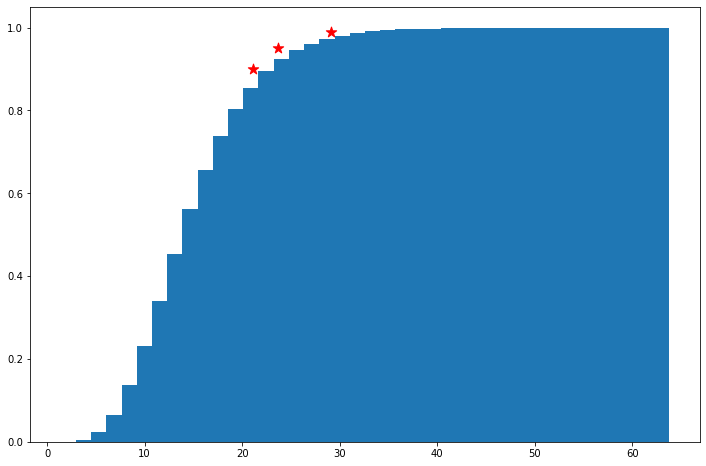

In [12]:
sample_num = 64_000

xis_vs = [xi_squared_criteria(0, 1, 200, 16, fy_deduced) for _ in range(sample_num)]
plt.hist(xis_vs, bins=40, cumulative=True, density=True)

plt.scatter([xi_090, xi_095, xi_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Колмогорова

***

### Критерий согласия Мизеса